# Data inspection

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
from collections import Counter
from wordcloud import WordCloud
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

## Loading the Dataset

In [68]:
data_path = "../../Data/full_arxiv.csv"
training_path = "../../Data/arxiv_train.csv"
val_path = "../../Data/arxiv_val.csv"
test_path = "../../Data/arxiv_test.csv"

df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,abstract,label
0,31716,Automatic meeting analysis is an essential f...,eess
1,89533,We propose a protocol to encode classical bi...,quant-ph
2,82700,A number of physically intuitive results for...,quant-ph
3,78830,In the last decade rare-earth hexaborides ha...,physics
4,94948,We introduce the weak barycenter of a family...,stat


In [69]:
train_df = pd.read_csv(training_path)
train_df.head()

,Unnamed: 0,abstract,label
0,9143,The prototype of the Large-Sized Telescope (...,astro-ph
1,26298,Segment Routing over IPv6 (SRv6 in short) is...,cs
2,96818,We consider the problem of identifying stabl...,stat
3,61590,"We study rotor walk, a deterministic counter...",math
4,43891,"In this conference paper I present GAMBIT , ...",hep-ph


In [70]:
val_df = pd.read_csv(val_path)
val_df.head()

,Unnamed: 0,abstract,label
0,17039,We discuss the effects of exponential fragme...,cond-mat
1,27221,This work presents a quantum convolutional n...,cs
2,68733,"Given two primes $p$, $q$, we show how to co...",math
3,45114,We investigate the direct $CP$ violation for...,hep-ph
4,68010,k Nearest Neighbor (kNN) method is a simple ...,math


In [71]:
test_df = pd.read_csv(test_path)
test_df.head()

,Unnamed: 0,abstract,label
0,64481,We describe a shape derivative approach to p...,math
1,48104,We study displaced signatures of sneutrino p...,hep-ph
2,48233,High precision studies of Beyond-Standard-Mo...,hep-ph
3,49026,We find that a class of models of MeV-GeV da...,hep-ph
4,37957,Knowledge of power grid's topology during ca...,eess


In [72]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  80000 non-null  int64 
 1   abstract    80000 non-null  object
 2   label       80000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [73]:
train_df.columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  64000 non-null  int64 
 1   abstract    64000 non-null  object
 2   label       64000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [74]:
val_df.columns
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16000 non-null  int64 
 1   abstract    16000 non-null  object
 2   label       16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [75]:
test_df.columns
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20000 non-null  int64 
 1   abstract    20000 non-null  object
 2   label       20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.9+ KB


In [76]:
print("Number of unique labels:", df["label"].nunique())
print("Labels found:", df["label"].unique())

Number of unique labels: 10
Labels found: ['eess' 'quant-ph' 'physics' 'stat' 'math' 'astro-ph' 'cond-mat' 'hep-th'
 'cs' 'hep-ph']


## Class Distribution

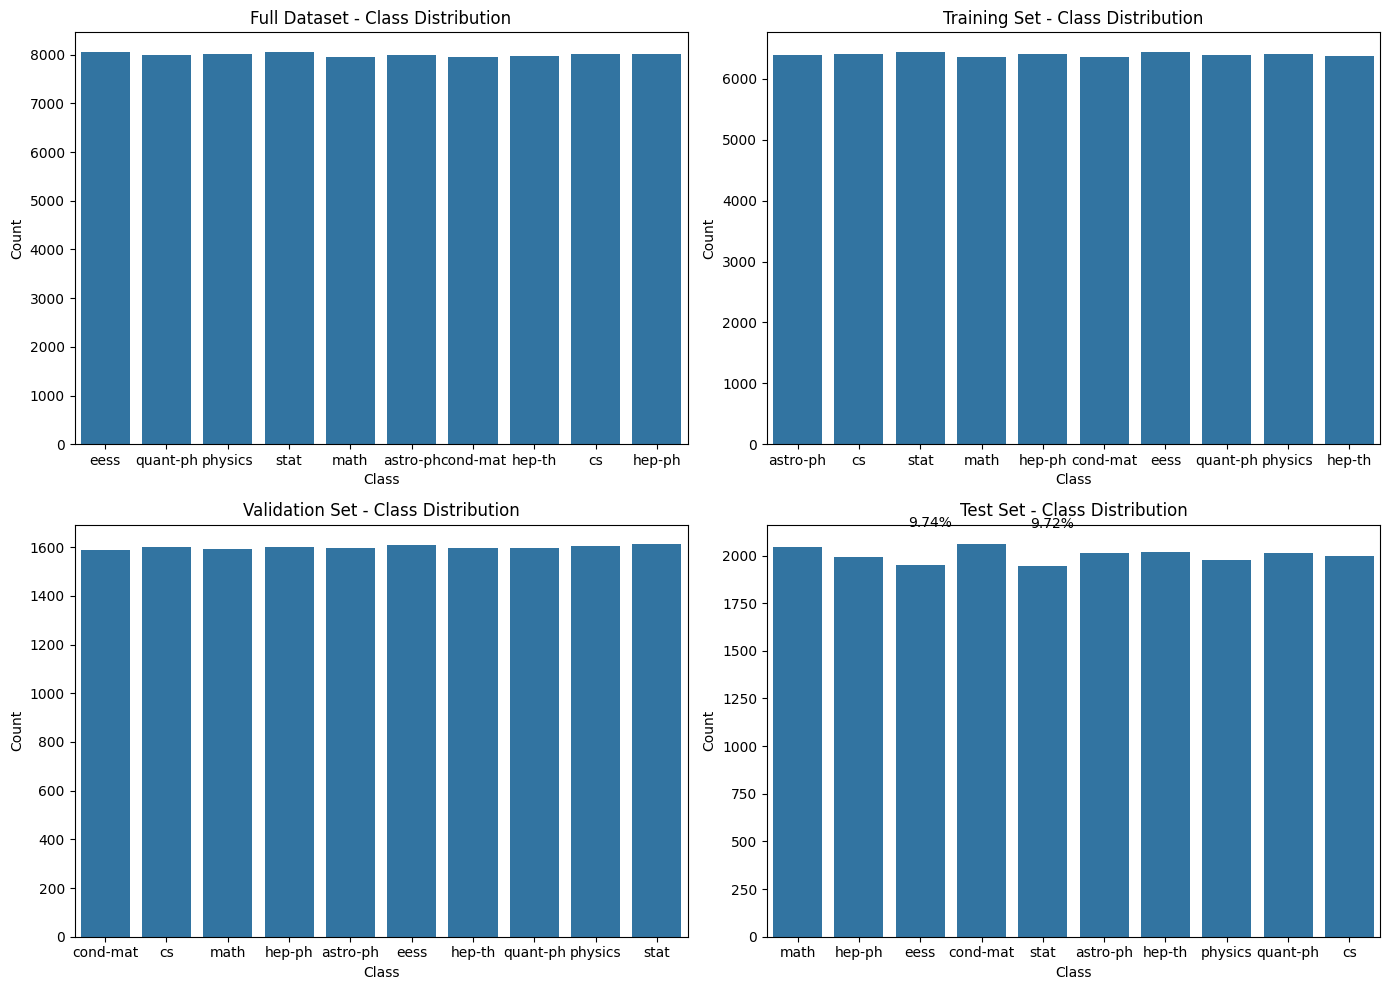

In [77]:
datasets = {
        "Full Dataset": df,
        "Training Set": train_df,
        "Validation Set": val_df,
        "Test Set": test_df
    }

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten to easily index

for i, (title, data) in enumerate(datasets.items()):
    ax = sns.countplot(x='label', data=data, ax=axes[i])
    total = len(data)
    
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.2f}%'
        ax.annotate(
            percentage,
            (p.get_x() + p.get_width() / 4, p.get_height() + max(total * 0.01, 1)),
            fontsize=10
        )
    
    ax.set_title(f"{title} - Class Distribution")
    ax.set_ylabel("Count")
    ax.set_xlabel("Class")

plt.tight_layout()
plt.show()

## Token lenght histogram

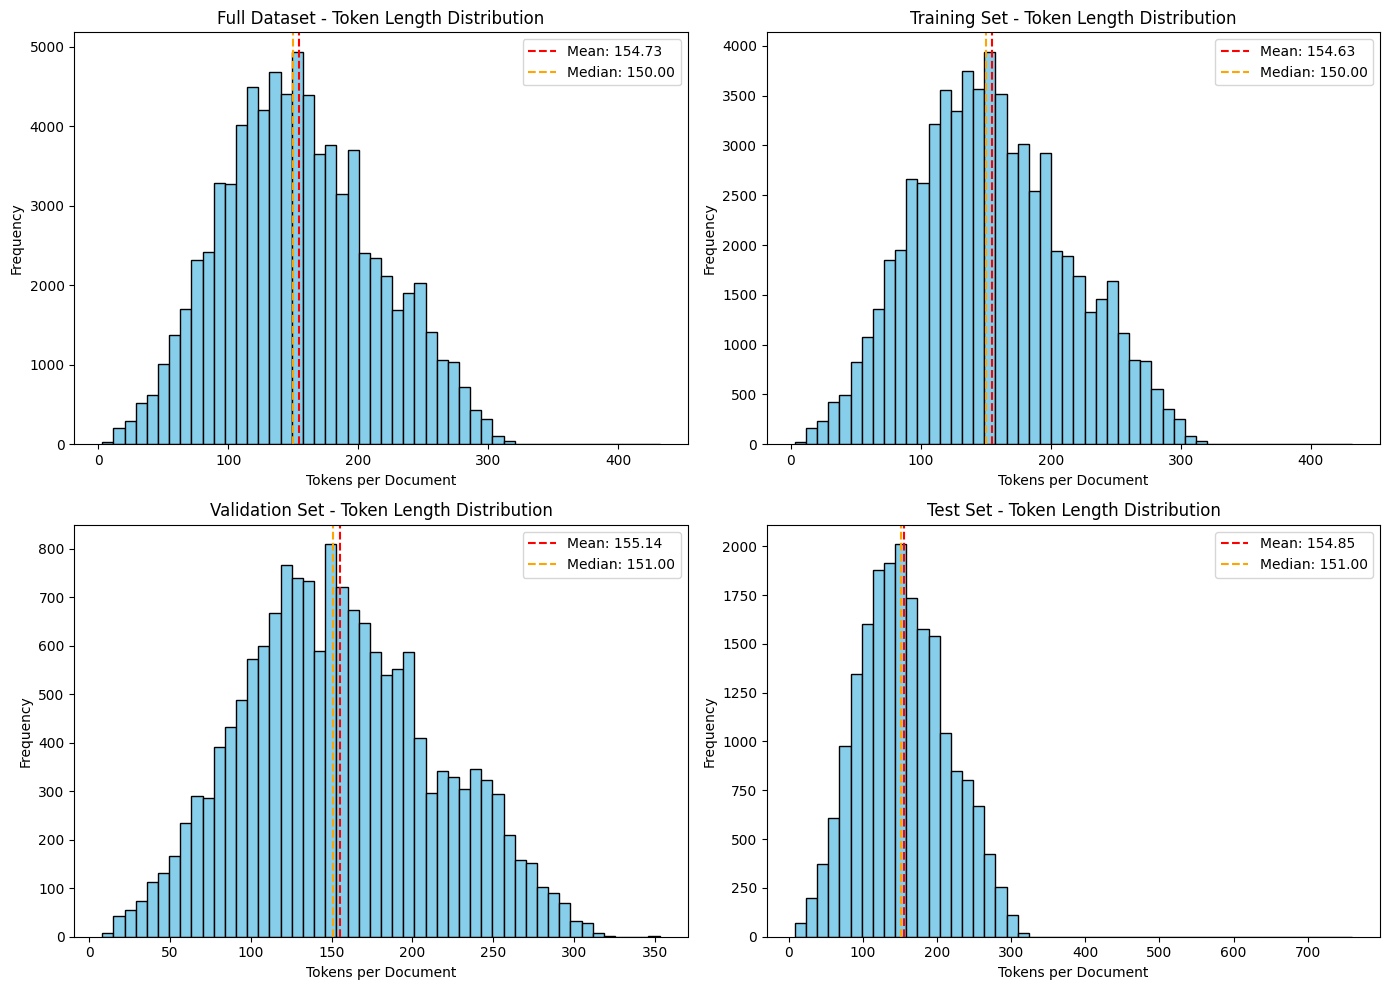

In [78]:
datasets = {
        "Full Dataset": df,
        "Training Set": train_df,
        "Validation Set": val_df,
        "Test Set": test_df
    }

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (title, data) in enumerate(datasets.items()):
    token_lengths = data['abstract'].apply(lambda x: len(x.split()))
    mean_len = token_lengths.mean()
    median_len = token_lengths.median()

    axes[i].hist(token_lengths, bins=50, color='skyblue', edgecolor='black')
    axes[i].axvline(mean_len, color='red', linestyle='--', label=f"Mean: {mean_len:.2f}")
    axes[i].axvline(median_len, color='orange', linestyle='--', label=f"Median: {median_len:.2f}")
    
    axes[i].set_title(f"{title} - Token Length Distribution")
    axes[i].set_xlabel("Tokens per Document")
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

plt.tight_layout()
plt.show()

## Word frequency analysis

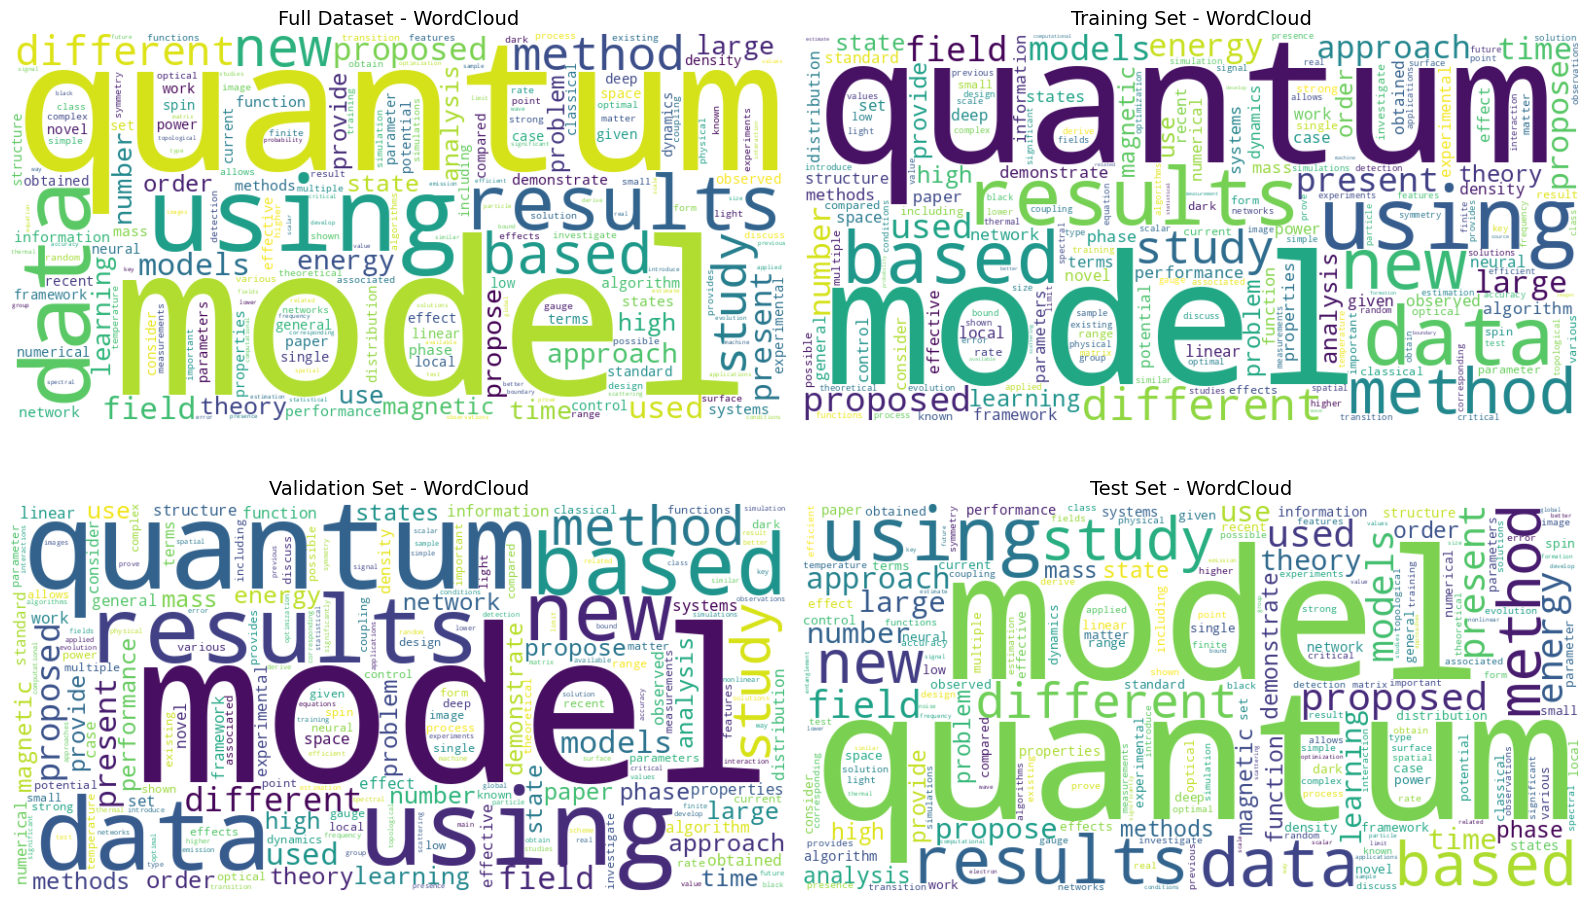

In [79]:
datasets = {
        "Full Dataset": df,
        "Training Set": train_df,
        "Validation Set": val_df,
        "Test Set": test_df
    }

custom_stop_words = set(ENGLISH_STOP_WORDS).union({'et', 'al', 'fig', 'figure', 'table'})

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, (title, data) in enumerate(datasets.items()):
    all_tokens = []
    for abstract in data['abstract']:
        tokens = abstract.lower().split()
        filtered = [token for token in tokens if token.isalpha() and token not in custom_stop_words]
        all_tokens.extend(filtered)

    word_freq = Counter(all_tokens)
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    axes[i].imshow(wc, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"{title} - WordCloud", fontsize=14)

plt.tight_layout()
plt.show()

## Average document lenght

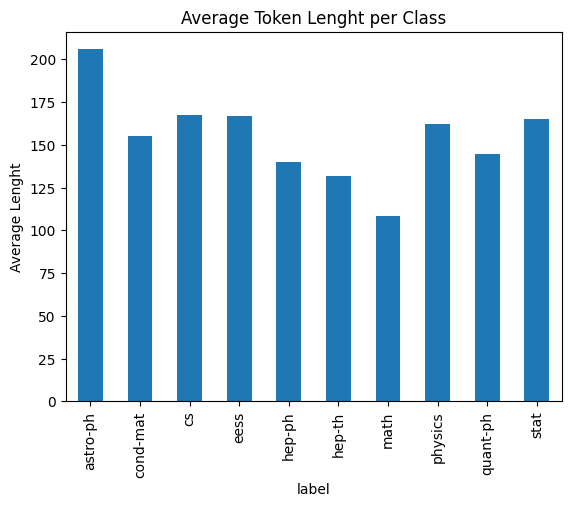

In [80]:

df['length'] = df['abstract'].apply(lambda x: len(x.split()))
df.groupby('label')['length'].mean().plot(kind='bar')
plt.title("Average Token Lenght per Class")
plt.ylabel("Average Lenght")
plt.show()

## Average Lenght per Label

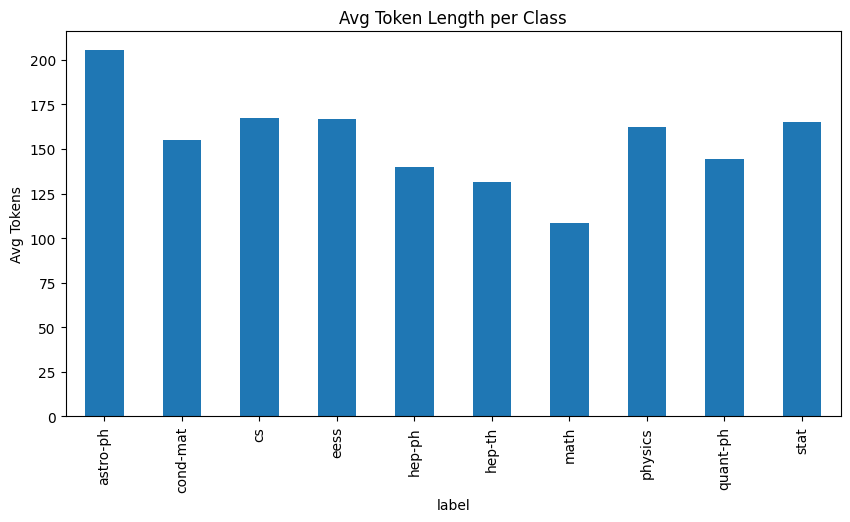

In [81]:
df["token_length"] = df["abstract"].apply(lambda x: len(x.split()))
df.groupby("label")["token_length"].mean().plot(kind="bar", figsize=(10, 5), title="Avg Token Length per Class")
plt.ylabel("Avg Tokens")
plt.show()

## Vocabulary Size

In [82]:
unique_words = set(word for text in df['abstract'] for word in text.split())
print("Vocabulary size: ", len(unique_words))

Vocabulary size:  432001


## Rare Word Proportion

In [83]:
all_words = [word for text in df["abstract"] for word in text.split()]
word_counts = Counter(all_words)

rare_words = [word for word, count in word_counts.items() if count == 1]
print(f"Rare words: {len(rare_words)} / {len(word_counts)} ({len(rare_words)/len(word_counts)*100:.2f}%)")


Rare words: 274926 / 432001 (63.64%)


## Top Tokens per Class

In [ ]:
custom_stop_words = set(ENGLISH_STOP_WORDS).union({'et', 'al', 'fig', 'figure', 'table'})

per_class_words = defaultdict(list)

for _, row in df.iterrows():
    words = row['abstract'].lower().split()
    filtered_words = [word for word in words if word not in custom_stop_words and word.isalpha()]
    per_class_words[row['label']].extend(filtered_words)

for label in per_class_words:
    print(f"\nTop tokens for class {label}:")
    print(Counter(per_class_words[label]).most_common(10))


Top tokens for class eess:
[('proposed', 6107), ('using', 4578), ('model', 4466), ('based', 4054), ('data', 4003), ('results', 3806), ('method', 3805), ('network', 3661), ('performance', 3512), ('learning', 3244)]

Top tokens for class quant-ph:
[('quantum', 23173), ('state', 3716), ('states', 3595), ('classical', 2946), ('using', 2817), ('entanglement', 2324), ('information', 2062), ('results', 2031), ('based', 1843), ('number', 1774)]

Top tokens for class physics:
[('using', 3523), ('model', 3135), ('results', 2605), ('energy', 2478), ('based', 2206), ('different', 2123), ('method', 2019), ('used', 1997), ('field', 1994), ('optical', 1990)]

Top tokens for class stat:
[('data', 7887), ('model', 6580), ('method', 4016), ('using', 3906), ('models', 3774), ('proposed', 3667), ('methods', 3295), ('approach', 3104), ('based', 3093), ('propose', 2929)]

Top tokens for class math:
[('prove', 2575), ('results', 2106), ('study', 1951), ('problem', 1617), ('paper', 1600), ('number', 1492), (

## Duplicate Check

In [85]:
df.duplicated().sum()

np.int64(0)